In [1]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon as Poly
from shapely.geometry import Polygon

In [2]:
# %matplotlib notebook

In [3]:
with open('sample.json', 'r') as f:
  data = json.load(f)

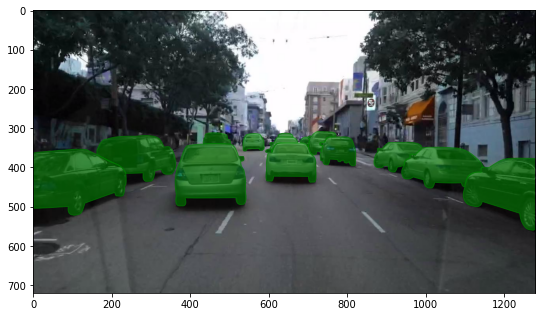

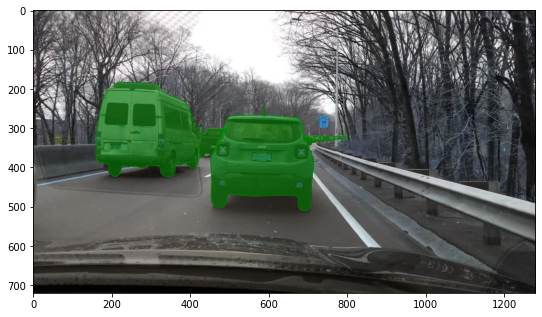

In [4]:
plt.figure(figsize=(9, 9))
ax = plt.subplot()
ax.clear()
img1 = data[0]
im1 = cv2.imread(img1['name'])
plt.imshow(im1)
for an in img1['labels']:
    if an['category'] == 'car':
        seg = np.array(an['poly2d'][0]['vertices'])
        segment = Polygon(seg)
        f = Poly(np.array(segment.exterior.xy).T, edgecolor = 'g', facecolor = 'g', alpha=0.6)
        ax.add_patch(f)
plt.show()

plt.figure(figsize=(9, 9))
ax = plt.subplot()
ax.clear()
img2 = data[1]
im2 = cv2.imread(img2['name'])
plt.imshow(im2)
for an in img2['labels']:
    if an['category'] == 'car':
        seg = np.array(an['poly2d'][0]['vertices'])
        segment = Polygon(seg)
        f = Poly(np.array(segment.exterior.xy).T, edgecolor = 'g', facecolor = 'g', alpha=0.6)
        ax.add_patch(f)
plt.show()

In [5]:
scale_factor = 0.015
area_thresh = im1.shape[0] *  im1.shape[1] * scale_factor

f_high = 1.55
f_low = 0.45

idx_1_2 = []
for idx1, annot1 in enumerate(data[0]['labels']):
    seg1 = Polygon(np.array(annot1['poly2d'][0]['vertices']))
    area1 = seg1.area
    if area1 > area_thresh:
        for idx2, annot2 in enumerate(data[1]['labels']):
            seg2 = Polygon(np.array(annot2['poly2d'][0]['vertices']))
            area2 = seg2.area
            if area2 > area_thresh:
                f = area1/area2  
                if f < f_high and f > f_low:
                    idx_1_2.append([idx1, idx2])

idx_1_2

[[0, 6], [0, 8], [16, 6], [16, 8]]

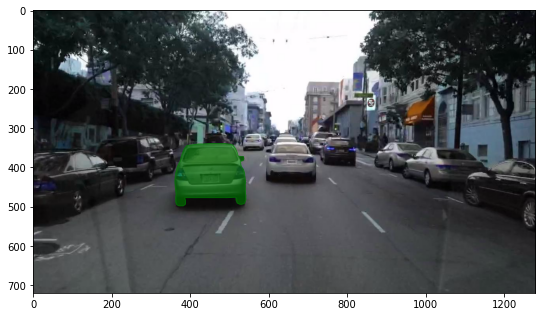

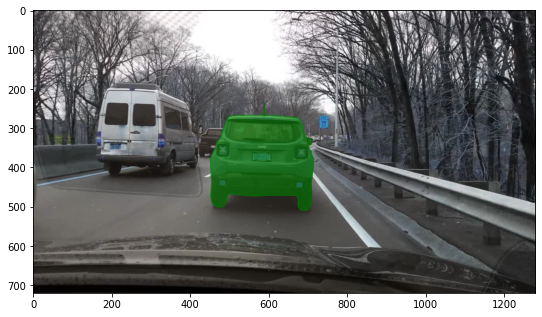

In [14]:
plt.figure(figsize=(9, 9))
ax = plt.subplot()
ax.clear()
img1 = data[0]
im1 = cv2.imread(img1['name'])
plt.imshow(im1)
seg = np.array(img1['labels'][0]['poly2d'][0]['vertices'], dtype=np.int32)
segment = Polygon(seg)
f = Poly(np.array(segment.exterior.xy).T, edgecolor = 'g', facecolor = 'g', alpha=0.6)
ax.add_patch(f)
plt.show()

plt.figure(figsize=(9, 9))
ax = plt.subplot()
ax.clear()
img2 = data[1]
im2 = cv2.imread(img2['name'])
plt.imshow(im2)
seg = np.array(img2['labels'][8]['poly2d'][0]['vertices'], dtype=np.int32)
segment = Polygon(seg)
f = Poly(np.array(segment.exterior.xy).T, edgecolor = 'g', facecolor = 'g', alpha=0.6)
ax.add_patch(f)
plt.show()

In [7]:
def swap(i1, i2, idx_1_2, swap_idx):
    image1 = cv2.imread(img1['name'])
    annot1 = i1['labels'][idx_1_2[swap_idx][0]]
    roi_corners1 = np.array([annot1['poly2d'][0]['vertices']], dtype=np.int32)
    xmin1 = np.min(roi_corners1[0][:,0])
    xmax1 = np.max(roi_corners1[0][:,0])
    ymin1 = np.min(roi_corners1[0][:,1])
    ymax1 = np.max(roi_corners1[0][:,1])
    
    image2 = cv2.imread(i2['name'])
    annot2 = i2['labels'][idx_1_2[swap_idx][1]]
    roi_corners2 = np.array([annot2['poly2d'][0]['vertices']], dtype=np.int32)
    xmin2 = np.min(roi_corners2[0][:,0])
    xmax2 = np.max(roi_corners2[0][:,0])
    ymin2 = np.min(roi_corners2[0][:,1])
    ymax2 = np.max(roi_corners2[0][:,1])
    
    mask1 = np.ones(image1.shape, dtype=np.uint8)
    mask1.fill(255)
    cv2.fillPoly(mask1, roi_corners1, 0)
    masked_image1 = cv2.bitwise_or(image1, mask1)
    masking_obj1 = masked_image1[ymin1:ymax1, xmin1:xmax1]
    masked_image1 = np.ones(image1.shape, dtype=np.uint8)
    masked_image1.fill(255)
    mask2 = np.ones(image2.shape, dtype=np.uint8)
    mask2.fill(255)
    cv2.fillPoly(mask2, roi_corners2, 0)
    masking_obj1 = cv2.resize(masking_obj1, (xmax2-xmin2, ymax2-ymin2), interpolation = cv2.INTER_AREA)
    masked_image1[ymin2:ymax2, xmin2:xmax2] = masking_obj1
    mask2 = 255 - mask2
    masked_image2 = cv2.bitwise_or(image2, mask2)
    mask2 = 255-masked_image1
    mask2[mask2 > 0] = 255
    masked_image2 = cv2.bitwise_or(masked_image2, mask2)
    
    swapped_1 = cv2.bitwise_and(masked_image1, masked_image2)
    
    mask2 = np.ones(image2.shape, dtype=np.uint8)
    mask2.fill(255)
    cv2.fillPoly(mask2, roi_corners2, 0)
    masked_image2 = cv2.bitwise_or(image2, mask2)
    masking_obj2 = masked_image2[ymin2:ymax2, xmin2:xmax2]
    masked_image2 = np.ones(image2.shape, dtype=np.uint8)
    masked_image2.fill(255)
    mask1 = np.ones(image1.shape, dtype=np.uint8)
    mask1.fill(255)
    cv2.fillPoly(mask1, roi_corners1, 0)
    masking_obj2 = cv2.resize(masking_obj2, (xmax1-xmin1, ymax1-ymin1), interpolation = cv2.INTER_AREA)
    masked_image2[ymin1:ymax1, xmin1:xmax1] = masking_obj2
    mask1 = 255 - mask1
    masked_image1 = cv2.bitwise_or(image1, mask1)
    mask1 = 255-masked_image2
    mask1[mask1 > 0] = 255
    masked_image1 = cv2.bitwise_or(masked_image1, mask1)
    
    swapped_2 = cv2.bitwise_and(masked_image2, masked_image1)
    
    return swapped_1, swapped_2

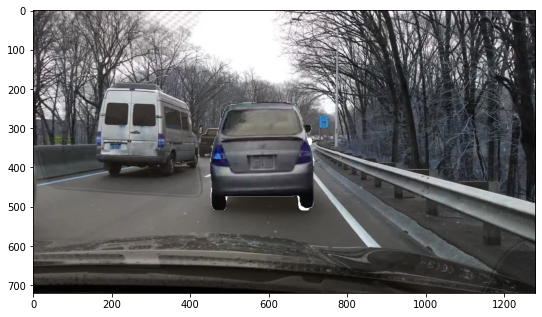

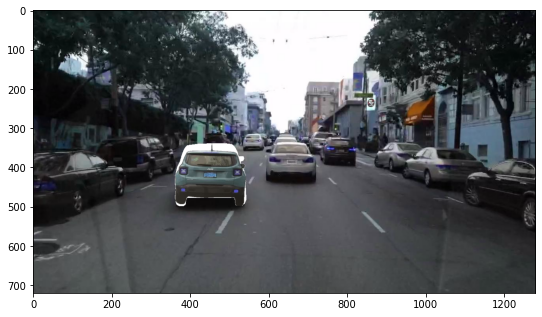

In [9]:
ii1, ii2 = swap(img1, img2, idx_1_2, 1)
plt.figure(figsize=(9, 9))
plt.imshow(ii1)
plt.show()
plt.figure(figsize=(9, 9))
plt.imshow(ii2)
plt.show()